In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

from utils import model_info, plot_history, load_data

In [2]:
X_train, y_train, X_val, y_val, X_test, y_test = load_data()

In [3]:
model = tf.keras.models.Sequential([    
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
], name='simple_cnn')

In [4]:
model_info(model)

Model: "simple_cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [5]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), callbacks=[early_stop])

Epoch 1/30
1350/1350 [==============================] - 18s 13ms/step - loss: 0.6611 - accuracy: 0.7969 - val_loss: 0.3876 - val_accuracy: 0.8594
Epoch 2/30
1350/1350 [==============================] - 18s 14ms/step - loss: 0.3896 - accuracy: 0.8585 - val_loss: 0.3747 - val_accuracy: 0.8669
Epoch 3/30
1350/1350 [==============================] - 17s 12ms/step - loss: 0.3432 - accuracy: 0.8746 - val_loss: 0.3254 - val_accuracy: 0.8848
Epoch 4/30
1350/1350 [==============================] - 15s 11ms/step - loss: 0.3157 - accuracy: 0.8853 - val_loss: 0.3184 - val_accuracy: 0.8844
Epoch 5/30
1350/1350 [==============================] - 16s 12ms/step - loss: 0.2898 - accuracy: 0.8937 - val_loss: 0.2994 - val_accuracy: 0.8924
Epoch 6/30
1350/1350 [==============================] - 15s 11ms/step - loss: 0.2721 - accuracy: 0.8986 - val_loss: 0.3106 - val_accuracy: 0.8918
Epoch 7/30
1350/1350 [==============================] - 18s 13ms/step - loss: 0.2541 - accuracy: 0.9065 - val_loss: 0.3025 -

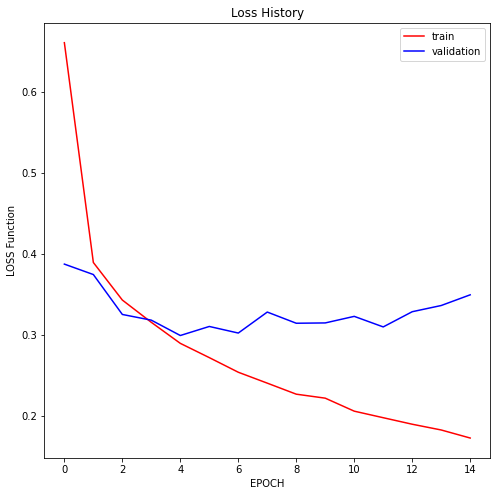

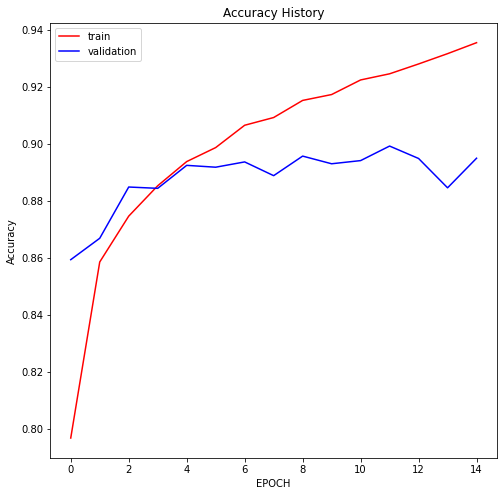

In [6]:
plot_history(history)

In [7]:
model.evaluate(X_test, y_test)

188/188 [==============================] - 1s 3ms/step - loss: 0.3730 - accuracy: 0.8830


[0.37297961115837097, 0.8830000162124634]

In [8]:
model.save('models/simple_cnn.h5')